# Tuned Models & Voting

## Tuned:

### Decision Trees

 - standard data & upsampled (Performed Better)
     - show predict_proba vs predict
     - Xval prone to overfitting upsample
     
### Logistic Regression

- show for standard

## RF?


 
## Voting

- DT + LR from std

     - predict proba only*

## Imports

In [3]:
#import modules

#SKLearn
import sklearn.model_selection as sk
import sklearn.metrics as m
from sklearn import ensemble as e
from sklearn import svm, linear_model, cluster
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Else
import sys
import pandas as pd
import math
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('default')

#full dfs
%store -r df 
%store -r scaled_df
%store -r fe_df
%store -r df_upsampled

%store -r x_tr
%store -r y_tr
%store -r x_te
%store -r y_te

%store -r xs_tr
%store -r ys_tr
%store -r xs_te
%store -r ys_te

%store -r x_fetr
%store -r y_fetr
%store -r x_fete
%store -r y_fete
%store -r xs_fetr
%store -r ys_fetr
%store -r xs_fete
%store -r ys_fete

%store -r x_uptr
%store -r y_uptr
%store -r x_upte
%store -r y_upte
%store -r xs_uptr
%store -r ys_uptr
%store -r xs_upte
%store -r ys_upte

%store -r cols
%store -r fe_cols
%store -r testsizepercent
%store -r th
%store -r sd

## Functions

In [4]:

def threshold(val, posval):
    return [1 if i>posval else 0 for i in val]

def plotAUC(truth, pred, lab, thresh):
    fpr, tpr, thresholds = m.roc_curve(truth, threshold(pred, thresh))
    roc_auc = m.auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    rets =  [fpr, tpr]
    return



def plot_scores(truth, pred, lab, thresh, rnd, out=False):
    #Scores
    acc_score = m.accuracy_score(truth, threshold(pred, thresh), normalize=True).round(rnd)
    prec_score = m.precision_score(truth, threshold(pred, thresh)).round(rnd)
    rec_score = m.recall_score(truth, threshold(pred, thresh)).round(rnd)
    f_score = m.f1_score(truth, threshold(pred, thresh)).round(rnd)
    avg_precision = m.average_precision_score(truth, threshold(pred, thresh)).round(rnd)
    rets = [acc_score, prec_score, rec_score, f_score, avg_precision]
    if out==True:
        print(lab, 'Average accuracy score: {0:0.2f}'.format(acc_score))
        print(lab, 'Average precision score: {0:0.2f}'.format(prec_score))
        print(lab, 'Average recall score: {0:0.2f}'.format(rec_score))
        print(lab, 'Average F1 score: {0:0.2f}'.format(f_score))
        print(lab, 'Average precision-recall score: {0:0.2f}'.format(avg_precision))
        print("---")
    return rets

## Decision Tree

DT_Tuned Average accuracy score: 0.76
DT_Tuned Average precision score: 0.91
DT_Tuned Average recall score: 0.70
DT_Tuned Average F1 score: 0.79
DT_Tuned Average precision-recall score: 0.84
---
DT_Tuned - pred Average accuracy score: 0.84
DT_Tuned - pred Average precision score: 0.86
DT_Tuned - pred Average recall score: 0.91
DT_Tuned - pred Average F1 score: 0.88
DT_Tuned - pred Average precision-recall score: 0.84
---


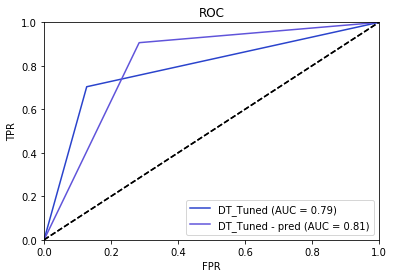

In [5]:
#Tuned DT on standard class

#SHOW PREDICT PROBA - PREDICT COMPARISON

dt_s1 = DecisionTreeClassifier(criterion='entropy', 
                               min_samples_split=100,
                               min_samples_leaf = 20,
                               max_features = 'auto', 
                               max_depth=50).fit(x_tr, y_tr)

b = plot_scores(y_te, dt_s1.predict_proba(x_te)[:,1], 
                'DT_Tuned', th, sd, out=True)
b = plot_scores(y_te, dt_s1.predict(x_te), 
                'DT_Tuned - pred', th, sd, out=True)

plotAUC(y_te, dt_s1.predict_proba(x_te)[:,1], 'DT_Tuned', th)
plotAUC(y_te, dt_s1.predict(x_te), 'DT_Tuned - pred', th)

DT_Tuned - te Average accuracy score: 0.81
DT_Tuned - te Average precision score: 0.93
DT_Tuned - te Average recall score: 0.67
DT_Tuned - te Average F1 score: 0.78
DT_Tuned - te Average precision-recall score: 0.79
---
DT_Tuned - te.pred Average accuracy score: 0.85
DT_Tuned - te.pred Average precision score: 0.86
DT_Tuned - te.pred Average recall score: 0.84
DT_Tuned - te.pred Average F1 score: 0.85
DT_Tuned - te.pred Average precision-recall score: 0.80
---


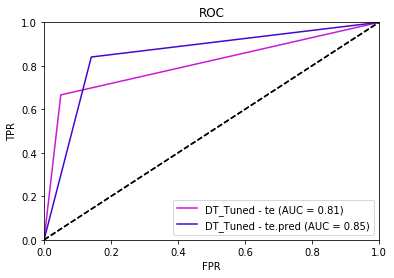

In [6]:
#Tuned DT on upsample

dt_up1 = DecisionTreeClassifier(criterion='entropy', 
                               min_samples_split=40,
                               min_samples_leaf = 15,
                               max_features = 'auto', 
                               max_depth=150).fit(x_uptr, y_uptr)



b = plot_scores(y_upte, dt_up1.predict_proba(x_upte)[:,1], 
                'DT_Tuned - te', th, sd, out=True)
b = plot_scores(y_upte, dt_up1.predict(x_upte), 
                'DT_Tuned - te.pred', th, sd, out=True)

plotAUC(y_upte, dt_up1.predict_proba(x_upte)[:,1], 'DT_Tuned - te', th)
plotAUC(y_upte, dt_up1.predict(x_upte), 'DT_Tuned - te.pred', th)

## Logistic Regression

C:\Users\Jeffs Laptop\.conda\envs\pfds\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LR - te Average accuracy score: 0.68
LR - te Average precision score: 0.88
LR - te Average recall score: 0.60
LR - te Average F1 score: 0.71
LR - te Average precision-recall score: 0.79
---


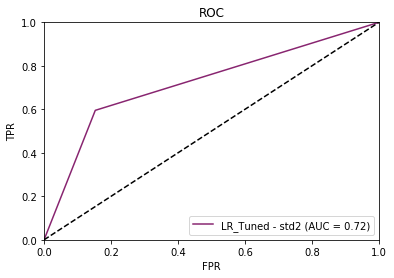

In [7]:
#LR - s: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}

lr_s1 = linear_model.LogisticRegression(solver='saga', penalty='l1', C=.1, max_iter=500).fit(x_tr, y_tr)

b = plot_scores(y_te, lr_s1.predict_proba(x_te)[:,1], 
                'LR - te', th, sd, out=True)

plotAUC(y_te, lr_s1.predict_proba(x_te)[:,1], 'LR_Tuned - std2', th)

LR - te Average accuracy score: 0.49
LR - te Average precision score: 0.90
LR - te Average recall score: 0.26
LR - te Average F1 score: 0.40
LR - te Average precision-recall score: 0.72
---


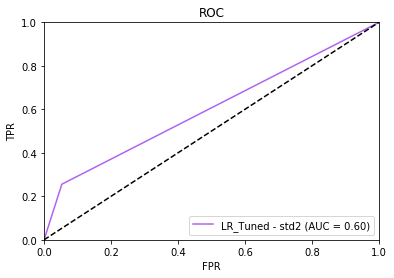

In [8]:
#LR - up: {'solver': 'saga', 'penalty': 'l1', 'C': 0.01}

lr_up1 = linear_model.LogisticRegression(solver='saga', penalty='l1', C=.01, max_iter=500)

lr_up1f = lr_up1.fit(x_uptr, y_uptr)

b = plot_scores(y_te, lr_up1f.predict_proba(x_te)[:,1], 
                'LR - te', th, sd, out=True)

plotAUC(y_te, lr_up1f.predict_proba(x_te)[:,1], 'LR_Tuned - std2', th)

## Voting Classifier

C:\Users\Jeffs Laptop\.conda\envs\pfds\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Vote Average accuracy score: 0.81
Vote Average precision score: 0.88
Vote Average recall score: 0.83
Vote Average F1 score: 0.85
Vote Average precision-recall score: 0.84
---


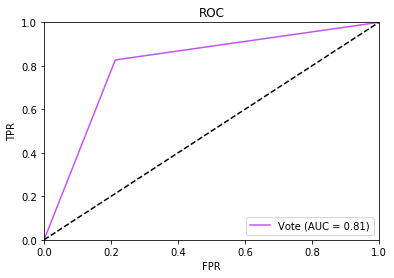

In [9]:
 
vote1 = e.VotingClassifier(estimators=[('lr', lr_up1), ('DT', dt_s1)], voting='hard').fit(x_tr, y_tr)

v1 = plot_scores(y_te, vote1.predict(x_te), 
                'Vote', th, sd, out=True)

plotAUC(y_te, vote1.predict(x_te), 'Vote', th)

C:\Users\Jeffs Laptop\.conda\envs\pfds\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Vote Average accuracy score: 0.81
Vote Average precision score: 0.88
Vote Average recall score: 0.82
Vote Average F1 score: 0.85
Vote Average precision-recall score: 0.84
---


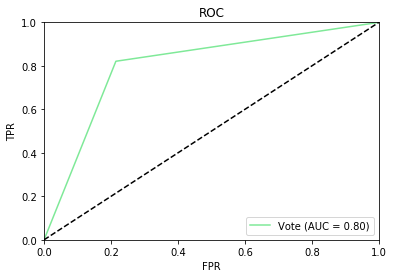

In [10]:
 
vote2 = e.VotingClassifier(estimators=[('lr', lr_up1f), ('DT', dt_s1)], voting='hard').fit(x_tr, y_tr)

v2 = plot_scores(y_te, vote2.predict(x_te), 
                'Vote', th, sd, out=True)

plotAUC(y_te, vote2.predict(x_te), 'Vote', th)